Import Libraries and Packages

In [1]:
# import relevant packages
import pandas as pd
import os
from pathlib import Path # path functions
import glob #for file paths
import numpy as np
from policy import *
import matplotlib.pyplot as plt

In [2]:
firstTrial = 17
lastTrial = 24 + 1 # +1 for python indexing
numTrials = lastTrial - firstTrial

In [3]:
cwd = os.getcwd() # Current working directory
dataDir = Path(os.path.join(Path(cwd).parents[1], "Data\MultiTargetHerdingExperimentValidation")) #Directory of all sessions

In [4]:
#get all lowest-level folders
participant_folders = list()
for root,dirs,files in os.walk(dataDir):
    if not dirs:
        participant_folders.append(root)

In [5]:
thresholds = np.arange(5,40) * math.pi / 180.0

In [6]:
columns = ["TrialID",
           "SuccessiveClosestAngleFromHerder",
           "SuccessiveAngleCollinearity"]

policyOrder = pd.DataFrame(columns = columns) 
policyFrequency = pd.DataFrame(np.zeros((numTrials,len(columns))), columns = columns)

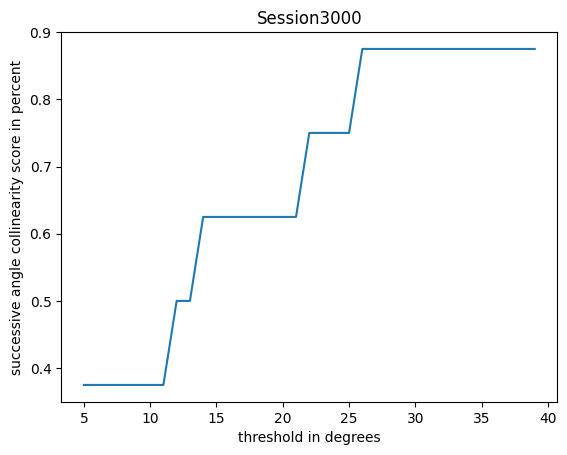

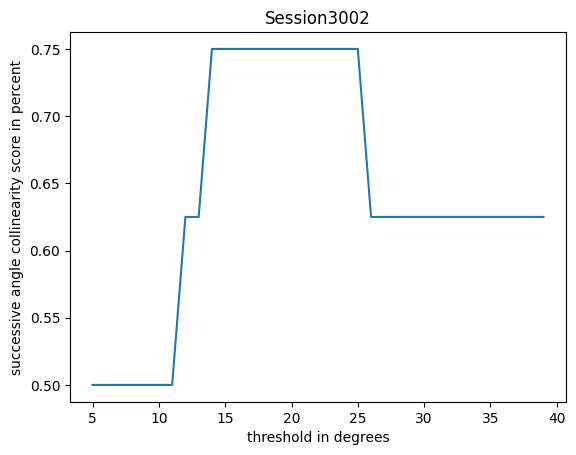

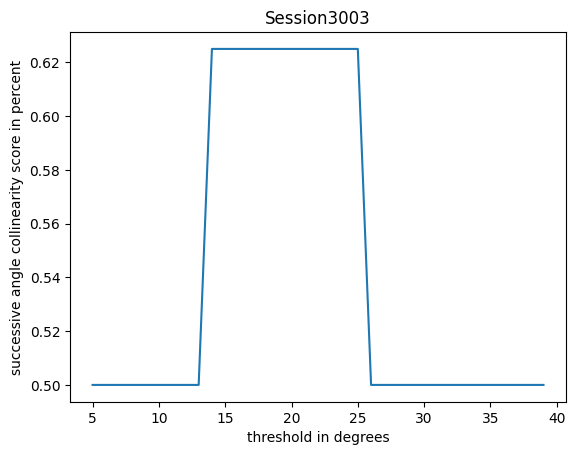

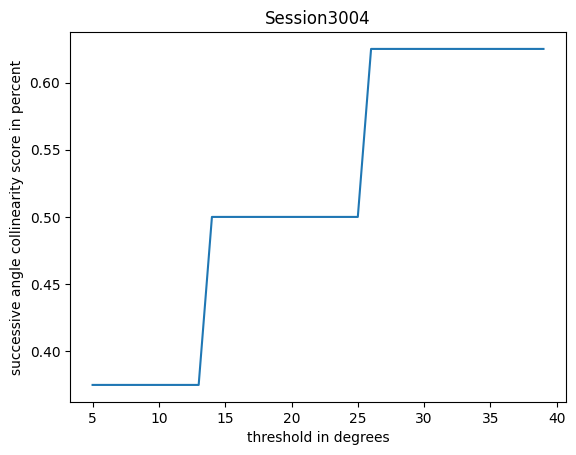

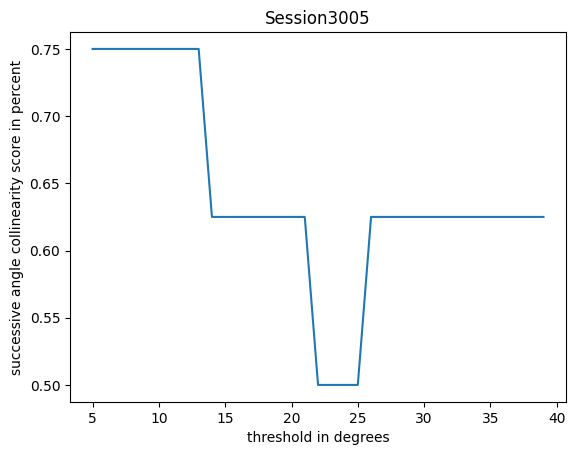

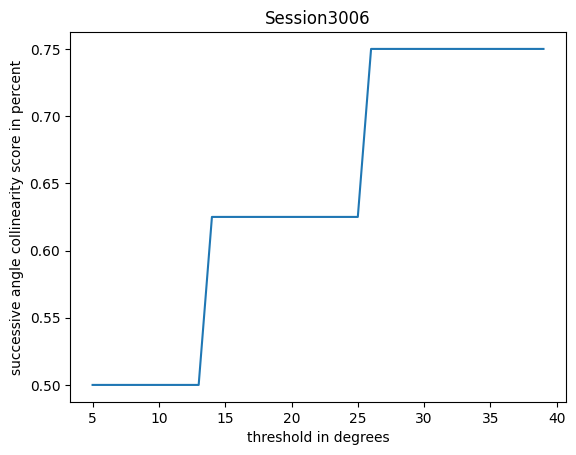

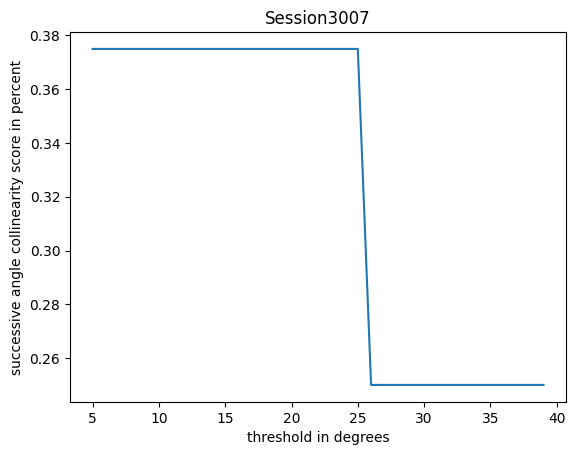

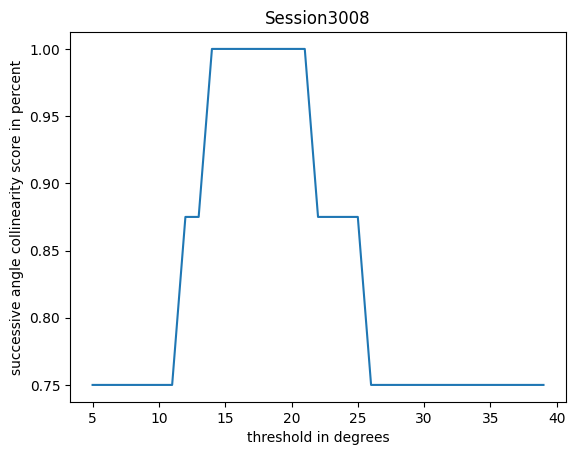

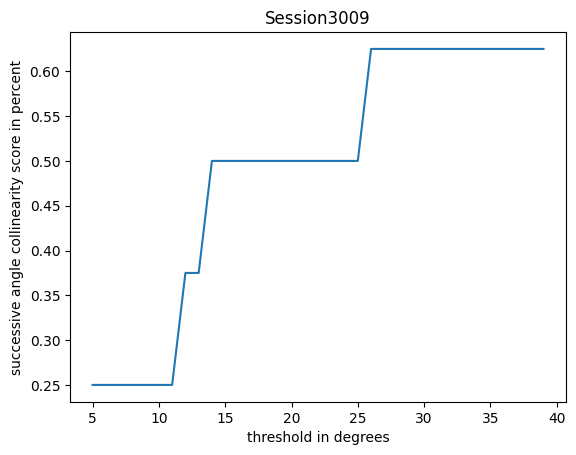

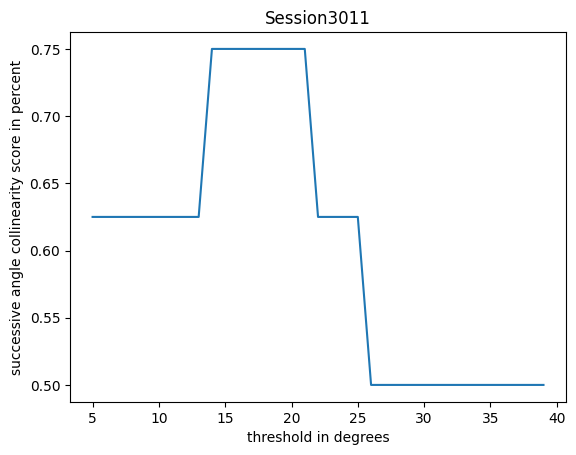

<Figure size 640x480 with 0 Axes>

In [7]:
for participant_folder in participant_folders: #loop over participants
    scores = list()
    for threshold in thresholds: #loop over thresholds
        score = 0
        tCount = 0
        for trial in range(firstTrial,lastTrial): #loop over trials
            trial_ID = "{:02}".format(trial)
            #for this participant (folder) and given trial ID; retrieve the right timeseries
            filename = glob.glob(participant_folder+'/*trialIdentifier'+trial_ID+'*')
            assert len(filename) == 1 #just the way glob.glob returns files, it's in a list
            trialData = pd.read_csv(filename[0])
            observedTargetOrdering = np.argsort([np.where(trialData.t0run)[0][0], np.where(trialData.t1run)[0][0], np.where(trialData.t2run)[0][0]])
            policyOrder = get_successive_collinearity_ordering(trialData, threshold)  
            match = order_match(policyOrder, observedTargetOrdering)
            if match == 1:
                #policyFrequency[policy][tCount] +=1
                score +=1
            tCount += 1
        score /= numTrials #score for a particular participant, for a particular threshold
        scores.append(score)
    plt.plot(thresholds * 180. / math.pi, scores)
    plt.xlabel('threshold in degrees')
    plt.ylabel('successive angle collinearity score in percent')
    plt.title(participant_folder[-11:])
    plt.figure()   